In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
from scipy import stats
import os


print(os.listdir("Resources/names"))

['.ipynb_checkpoints', 'NationalReadMe.pdf', 'yob1970.txt', 'yob1971.txt', 'yob1972.txt', 'yob1973.txt', 'yob1974.txt', 'yob1975.txt', 'yob1976.txt', 'yob1977.txt', 'yob1978.txt', 'yob1979.txt', 'yob1980.txt', 'yob1981.txt', 'yob1982.txt', 'yob1983.txt', 'yob1984.txt', 'yob1985.txt', 'yob1986.txt', 'yob1987.txt', 'yob1988.txt', 'yob1989.txt', 'yob1990.txt', 'yob1991.txt', 'yob1992.txt', 'yob1993.txt', 'yob1994.txt', 'yob1995.txt', 'yob1996.txt', 'yob1997.txt', 'yob1998.txt', 'yob1999.txt', 'yob2000.txt', 'yob2001.txt', 'yob2002.txt', 'yob2003.txt', 'yob2004.txt', 'yob2005.txt', 'yob2006.txt', 'yob2007.txt', 'yob2008.txt', 'yob2009.txt', 'yob2010.txt', 'yob2011.txt', 'yob2012.txt', 'yob2013.txt', 'yob2014.txt', 'yob2015.txt', 'yob2016.txt', 'yob2017.txt']


In [2]:
year = []
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        namefile = pd.read_csv(f"Resources/names/{filename}",header=None)
        namefile['year'] = os.path.splitext(filename)[0][-4:]
        year.append(namefile)

#data is in series, merge all years together
df = pd.concat(year)

In [3]:
df.head()

,0,1,2,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [4]:
name_df = df.rename(columns={
    0:'name',
    1:'gender',
    2:'count'
})
name_df.head()

,name,gender,count,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [5]:
name_df.dtypes

name      object
gender    object
count      int64
year      object
dtype: object

In [6]:
#count of total babies born in the year
yearTotal_df = name_df.groupby('year').sum().rename(columns={'count':'yearTotal'})

In [7]:
yearTotal_df.head()

,yearTotal
year,
2000,3778079
2001,3741451
2002,3736042
2003,3799971
2004,3818361


In [8]:
#merge total babies born in year and unique names
name_df = name_df.merge(yearTotal_df,on='year')
name_df.head()

,name,gender,count,year,yearTotal
0,Emily,F,25953,2000,3778079
1,Hannah,F,23080,2000,3778079
2,Madison,F,19967,2000,3778079
3,Ashley,F,17997,2000,3778079
4,Sarah,F,17697,2000,3778079


In [9]:
#Calculate % of name
name_df['name_percent'] = 100*(name_df.loc[:,'count']/name_df.loc[:,'yearTotal'])
name_df.head()

arya_df = name_df[name_df['name']=='Arya'][['name','count','gender','year']]
arya_df.head()

,name,count,gender,year
3741,Arya,34,F,2000
19792,Arya,47,M,2000
33408,Arya,36,F,2001
49889,Arya,48,M,2001
62818,Arya,54,F,2002


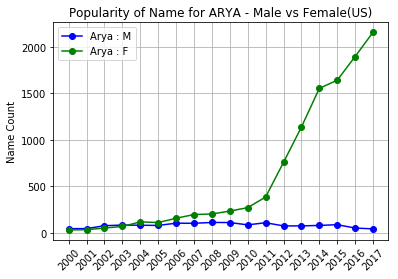

In [26]:
#set male and female dataframe
arya_f_df = arya_df[arya_df['gender']=='F'].copy().sort_values('year')
arya_m_df = arya_df[arya_df['gender']=='M'].copy().sort_values('year')
arya_m_plot = plt.plot(arya_m_df['year'],arya_m_df['count'],c='b',marker='o',label='Arya : M')
arya_f_plot = plt.plot(arya_f_df['year'],arya_f_df['count'],c='g',marker='o',label='Arya : F')
plt.xticks(rotation=45)
plt.grid()
plt.title("Popularity of Name for ARYA - Male vs Female(US)")
plt.ylabel("Name Count")
plt.legend()
plt.savefig("Graph_Images/GoT/arya_male_vs_female.png")

In [ ]:
#regression
slope, intercept, r_value, p_value, std_err = stats.linregress(arya_f_df['year'].astype(int),arya_f_df['count'])
print(f"female regression: {p_value}")

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(arya_m_df['year'].astype(int),arya_m_df['count'])
print(f"male regression: {p_value}")

In [ ]:
#Get top 5 female names in year 2011
female_y2011 = name_df[(name_df['gender']=='F') & (name_df['year']=='2011')] 
female_y2011 = female_y2011.sort_values('count',ascending=False)
female_y2011['rank'] = female_y2011['name_percent'].rank(ascending=False)
female_y2011.head(10)

In [ ]:
#Rank 2017 females
female_y2017 = name_df[(name_df['gender']=='F') & (name_df['year']=='2017')] 
female_y2017 = female_y2017.sort_values('count',ascending=False)
female_y2017['rank'] = female_y2017['name_percent'].rank(ascending=False)
female_y2017.head(10)

In [ ]:
#merge 2011 vs 2017
merge_female = female_y2011.merge(female_y2017,on='name',suffixes=('_y2011','_y2017'))
merge_female['rankChange'] = merge_female['rank_y2017'] - merge_female['rank_y2011']
merge_female['percentChange'] = merge_female['name_percent_y2017'] - merge_female['name_percent_y2011']
merge_female['countChange'] = merge_female['count_y2017'] - merge_female['count_y2011']
merge_female.head(10)

In [ ]:
#dataframe for top 5 and top 10 Y2011 females only
top5_df = merge_female.head(5)

top10_df = merge_female.head(10)
top10_df

In [ ]:
#set color for positive and negative change

percentChanges = []
percentChanges = top10_df['percentChange']

colors = []
for value in range(0,len(top10_df)):
    if percentChanges[value] < 0:
        colors.append('red')
    else:
        colors.append('green')
colors

In [ ]:
percentChanges

In [ ]:
# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(top10_df['name'],height=percentChanges,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,10,alpha=0.75)
plt.title('Top 10 Female Names Change from 2011 vs 2017')
plt.ylabel('Change in %')
plt.xlabel('Top 10 Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),2))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10Female_Change.png")

# Show the Figure
plt.show()

In [ ]:
#Find names from 2011
#Arya (aka Arya Stark): Noble
#Arianne (aka Arianne Martell): Very holy one
#Asha (aka Asha Greyjoy): Life
#Brienne (aka Brienne of Tarth): Strong
#Catelyn (aka Cat Stark): Pure
#Cersei (aka Cersei Lannister): Enchantress
#Daenerys (aka Daenerys Targaryen): Born of the storm
#Ella (aka Ellaria Sand): Beautiful fairy
#Elia (aka Elia Sand): Jehovah is God
#Gilly (aka Gilly Craster): My joy

got_top10 = ['Arya','Arianne','Asha','Brienne','Catelyn','Cersei','Daenerys','Ella','Elia','Gilly']
got_female_df = merge_female.loc[merge_female['name'].isin(got_top10)]
got_female_df = got_female_df[['name','rank_y2011','name_percent_y2011','rank_y2017','name_percent_y2017','rankChange','percentChange','countChange']]
got_female_df = got_female_df.reset_index()        



In [ ]:
got_female_df

In [ ]:
#set color for positive and negative change

percentChanges = []
percentChanges = got_female_df['percentChange']

colors = []
for value in range(0,len(percentChanges)):
    if percentChanges[value] < 0:
        colors.append('red')
    else:
        colors.append('green')


# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(got_female_df['name'],height=percentChanges,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,6,alpha=0.75)
plt.title('Top 10 GOT Female Names Change from 2011 vs 2017')
plt.ylabel('Change in %')
plt.xlabel('Top 10 GOT Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),4))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10GOTFemale_Change.png")

# Show the Figure
plt.show()


In [ ]:
merge_female.dtypes

In [ ]:
#rank of Arya index = 713

similar_df = merge_female.iloc[710:717]
similar_df

In [ ]:
#set color for positive and negative change

countChanges_1 = []
countChanges_1 = similar_df['countChange']

colors_1 = []
for value in countChanges_1:
    print(value)
    if value < 0:
        colors_1.append('red')
    else:
        colors_1.append('green')




In [ ]:

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(similar_df['name'],height=countChanges_1,color=colors_1,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,6,alpha=0.75)
plt.title('Similar Ranked Female Names Change from 2011 vs 2017')
plt.ylabel('Change in Count')
plt.xlabel('Similar Ranked Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=round((value.get_height()),4))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/SimilarRankedFemales_Change.png")

# Show the Figure
plt.show()

In [ ]:
#average % change
print(f"Y2011 average: {merge_female['name_percent_y2011'].mean()}, Y2017 average: {merge_female['name_percent_y2017'].mean()}")
print(f"percent mean change: {merge_female['percentChange'].mean()}")


In [ ]:
#Average of all other names
female_other = ['Jaylin','Ali','Taliyah','Emilie','Destinee','Jaida']
other_df = merge_female.loc[merge_female['name'].isin(female_other)]
avg_y2011 = other_df['name_percent_y2011'].mean()
avg_y2017 = other_df['name_percent_y2017'].mean()
arya_y2011 = merge_female.loc[merge_female['name']=='Arya']['name_percent_y2011'].sum()
arya_y2017 = merge_female[merge_female['name']=='Arya']['name_percent_y2017'].sum()
print(f"avg of percent change in 2011: {avg_y2011}, avg of percent change in 2017: {avg_y2017}")
print(f"arya 2011: {arya_y2011}, arya in 2017: {arya_y2017}")

In [ ]:
#create 2 x 2 for fisher exact
stat_df1 = pd.DataFrame([[avg_y2011],[avg_y2017]]).T
stat_df2 = pd.DataFrame([[arya_y2011],[arya_y2017]]).T
stat_df = pd.concat([stat_df1,stat_df2])
stat_df

In [ ]:
sim_names = [x for x in set(similar_df["name"]) if x not in ["Arya"]]

In [ ]:
sim_names

In [ ]:
df_other_attempt = pd.DataFrame(similar_df[similar_df["name"].isin(sim_names)])
arya_only_df = similar_df[similar_df["name"] == "Arya"]
df_other_attempt["observed"] = df_other_attempt["count_y2017"] - df_other_attempt["count_y2011"]
df_other_attempt["expected"] = (arya_only_df["count_y2017"] - arya_only_df["count_y2011"]).values[0]

In [ ]:
df_other_attempt[["name", "observed", "expected"]]

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df_other_attempt['observed'], df_other_attempt['expected'])

In [ ]:
# chi-square
# Observed data in a (hypothetical) survey of 6000 people 
observed = observed = pd.Series([], index=["1", "2", "3", "4", "5", "6"])

# Create a data frame
df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df[1] = .0502

# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

In [ ]:
df_normalized = df * 100

In [ ]:
critical_value = stats.chi2.ppf(q = 0.95, df = 5)

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df_normalized['observed'], df_normalized['expected'])

In [ ]:
# Run the chi square test with stats.chisquare()
oddsratio, pvalue = stats.fisher_exact([[0.010597,0.005823],[0.010597,0.060796]])
pvalue

In [ ]:
a = [[15 * 1000, 14 * 1000], [11 * 1000, 12 * 1000]]

In [ ]:
stats.fisher_exact(a)